<a href="https://colab.research.google.com/github/iamrafinawaz/Data-Analytics/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA - 1


In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [74]:
df=pd.read_csv('BIKE DETAILS.csv')
df.head()

name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN

In [75]:
# 1. What is the range of selling prices in the datasetD
min=df['selling_price'].min()
max=df['selling_price'].max()
print(min,max)



5000 760000


In [76]:
# 2. What is the median selling price for bikes in the dataset?

median_price=df['selling_price'].median()
print(median_price)

45000.0


In [77]:
# 3. What is the most common seller type?
most_common_seller=df['seller_type'].mode()[0]
print(most_common_seller)


Individual


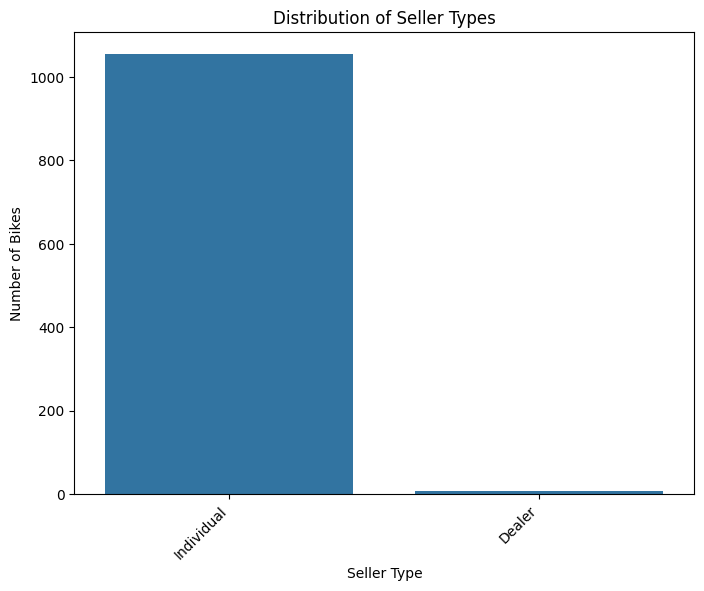

In [78]:
seller_type_counts = df['seller_type'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=seller_type_counts.index, y=seller_type_counts.values)
plt.title('Distribution of Seller Types')
plt.xlabel('Seller Type')
plt.ylabel('Number of Bikes')
plt.xticks(rotation=45, ha='right')
plt.show()

In [79]:
# Hence most common seller type is "Individual"

In [80]:
# 4. How many bikes have driven more than 50,000 kilometers?

bikes_over_50km=df[df['km_driven']>50000].shape[0]
bikes_over_50km

170

In [81]:
# 5. What is the average km_driven value for each ownership type?

average_km_driven=df.groupby('owner')['km_driven'].mean()
average_km_driven

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

In [82]:
# 6. What proportion of bikes are from the year 2015 or older?
older_bikes_proportion = df[df['year'] <= 2015].shape[0] / df.shape[0]
print(f"Proportion of bikes from 2015 or older: {older_bikes_proportion:.2f}")


Proportion of bikes from 2015 or older: 0.57


In [83]:
# 7. What is the trend of missing values across the dataset?

missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [84]:
# 8. What is the highest ex_showroom_price recorded, and for which bike?

max_ex_showroom_price = df['ex_showroom_price'].max()
bike_with_max_price = df[df['ex_showroom_price'] == max_ex_showroom_price]['name'].iloc[0]
print(f"Highest ex_showroom_price: {max_ex_showroom_price}, for bike: {bike_with_max_price}")

Highest ex_showroom_price: 1278000.0, for bike: Harley-Davidson Street Bob


In [85]:
# 9. What is the total number of bikes listed by each seller type?

bike_count_by_seller = df.groupby('seller_type')['name'].count()
print("Total number of bikes listed by each seller type:")
print(bike_count_by_seller)

Total number of bikes listed by each seller type:
seller_type
Dealer           6
Individual    1055
Name: name, dtype: int64


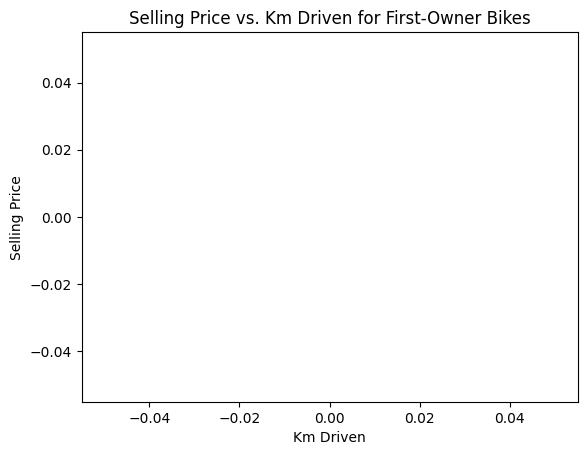

Correlation between selling_price and km_driven for first-owner bikes: nan


In [86]:
# 10. What is the relationship between selling_price and km_driven for first-owner bikes?


first_owner_bikes = df[df['owner'] == 'First Owner']

plt.scatter(first_owner_bikes['km_driven'], first_owner_bikes['selling_price'])
plt.title("Selling Price vs. Km Driven for First-Owner Bikes")
plt.xlabel("Km Driven")
plt.ylabel("Selling Price")
plt.show()

correlation = first_owner_bikes['selling_price'].corr(first_owner_bikes['km_driven'])
print(f"Correlation between selling_price and km_driven for first-owner bikes: {correlation:.2f}")

In [87]:
# 11. 11. Identify and remove outliers in the km_driven column using the IQR method.

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print("Outliers removed from km_driven column.")

Outliers removed from km_driven column.


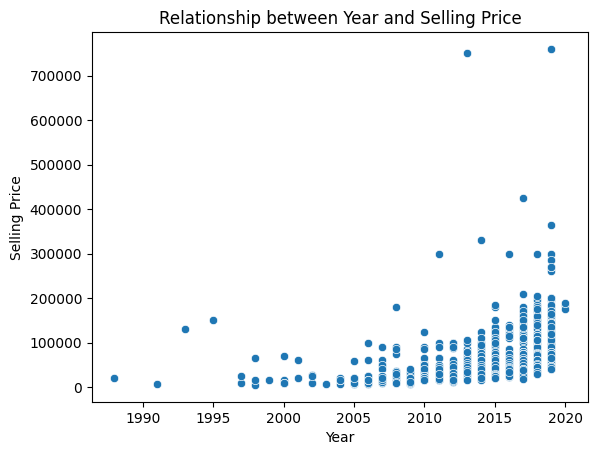

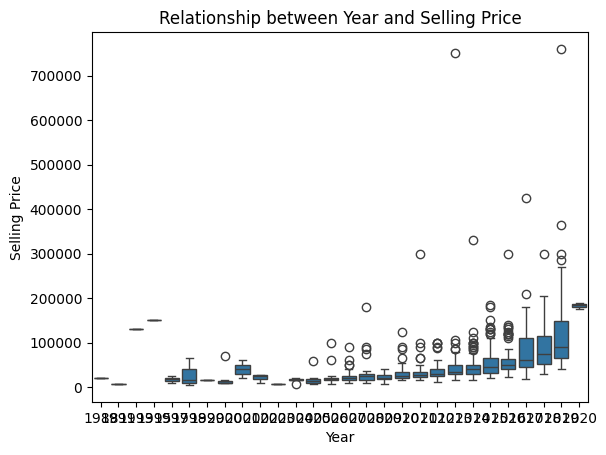

In [88]:
# 12. Perform a bivariate analysis to visualize the relationship between year and selling_price.


sns.scatterplot(x='year', y='selling_price', data=df)
plt.title("Relationship between Year and Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()

sns.boxplot(x='year', y='selling_price', data=df)
plt.title("Relationship between Year and Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()

In [89]:
# 13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

df['age'] = 2023 - df['year']
avg_depreciation_by_age = df.groupby('age')['selling_price'].mean()
print("Average depreciation in selling price based on age:")
print(avg_depreciation_by_age)


Average depreciation in selling price based on age:
age
3     183333.333333
4     119689.511628
5      87660.374046
6      78894.736842
7      58469.018692
8      56500.000000
9      48668.131868
10     51136.986301
11     35748.400000
12     35655.721311
13     31793.333333
14     22267.857143
15     34289.285714
16     24927.586207
17     23380.000000
18     16978.571429
19     15100.000000
20      8000.000000
21     20666.666667
22     40000.000000
23     20833.333333
24     15000.000000
25     28333.333333
26     17500.000000
28    150000.000000
30    130000.000000
32      6000.000000
35     20000.000000
Name: selling_price, dtype: float64


In [90]:
# 14. Which bike names are priced significantly above the average price for their manufacturing year?

avg_price_by_year = df.groupby('year')['selling_price'].mean()
df['avg_price_for_year'] = df['year'].map(avg_price_by_year)
significantly_priced_bikes = df[df['selling_price'] > (df['avg_price_for_year'] * 1.2)]  # Assuming 'significantly' is 20% above average
print("Bikes priced significantly above average for their year:")
print(significantly_priced_bikes[['name', 'year', 'selling_price', 'avg_price_for_year']])

Bikes priced significantly above average for their year:
                                      name  year  selling_price  \
0                Royal Enfield Classic 350  2019         175000   
2      Royal Enfield Classic Gunmetal Grey  2018         150000   
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                           Yamaha YZF R3  2019         365000   
17                        Yamaha YZF R15 S  2010          40000   
...                                    ...   ...            ...   
984              Royal Enfield Classic 500  2014          95000   
985              Royal Enfield Classic 500  2011          90000   
1005                    TVS Apache RTR 160  2014          60000   
1008                    Bajaj Pulsar 220 F  2012          52000   
1023                Bajaj Avenger 220 dtsi  2012          45000   

      avg_price_for_year  
0          119689.511628  
2           87660.374046  
7           34289.285714  
13         119689.511628  
17 

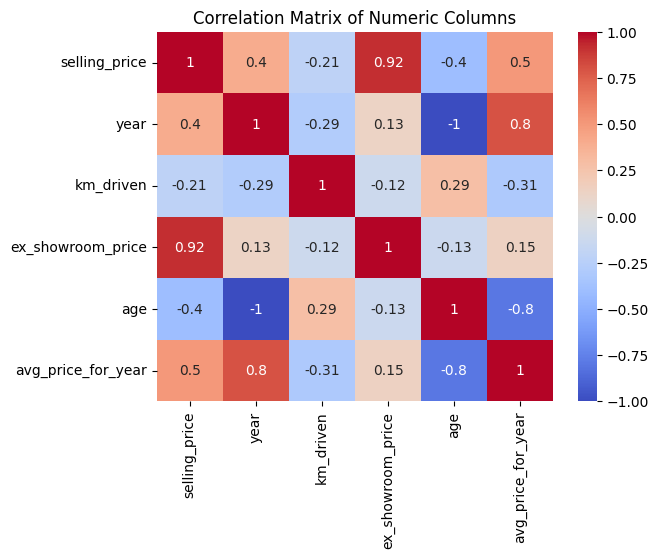

In [91]:
# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Columns")
plt.show()

EDA - 2

In [92]:
df=pd.read_csv('Car Sale.csv')
df.describe()

Annual Income     Price ($)         Phone
count   2.390600e+04  23906.000000  2.390600e+04
mean    8.308403e+05  28090.247846  7.497741e+06
std     7.200064e+05  14788.687608  8.674920e+05
min     1.008000e+04   1200.000000  6.000101e+06
25%     3.860000e+05  18001.000000  6.746495e+06
50%     7.350000e+05  23000.000000  7.496198e+06
75%     1.175750e+06  34000.000000  8.248146e+06
max     1.120000e+07  85800.000000  8.999579e+06

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [94]:
df.shape


(23906, 16)

Average selling price of cars for each dealer:
 Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                              

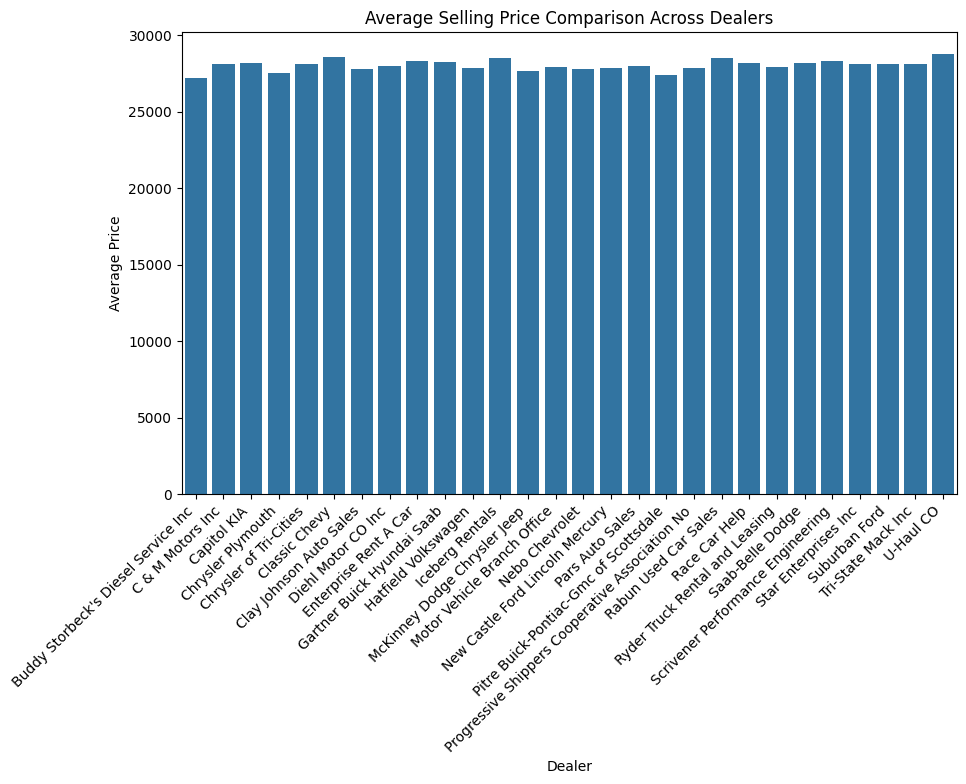

In [95]:
avg_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean()
print("Average selling price of cars for each dealer:\n", avg_price_by_dealer)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_dealer.index, y=avg_price_by_dealer.values)
plt.title('Average Selling Price Comparison Across Dealers')
plt.xlabel('Dealer')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()

Car brand with the highest price variation: Lincoln


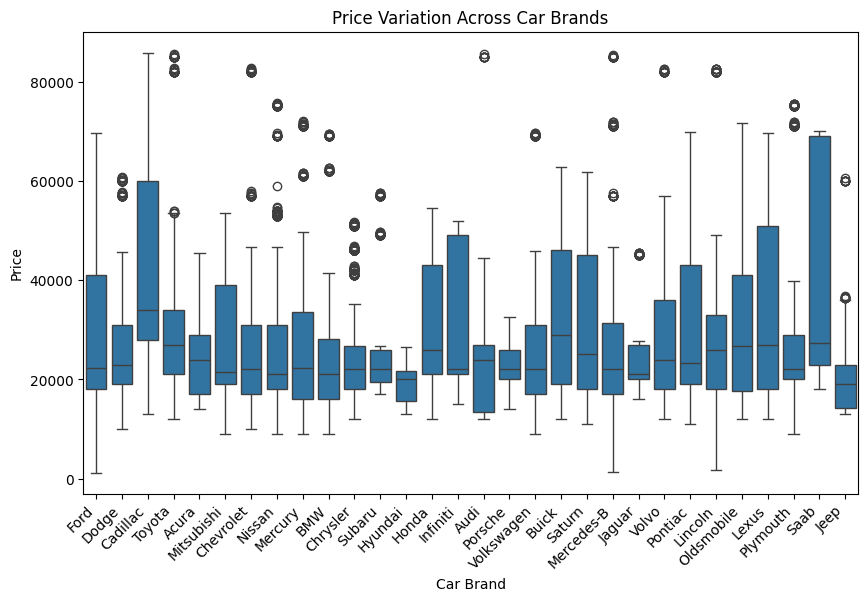

In [96]:
# 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

price_variation_by_brand = df.groupby('Company')['Price ($)'].std()
brand_with_highest_variation = price_variation_by_brand.idxmax()
print(f"Car brand with the highest price variation: {brand_with_highest_variation}")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Company', y='Price ($)', data=df)
plt.title('Price Variation Across Car Brands')
plt.xlabel('Car Brand')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

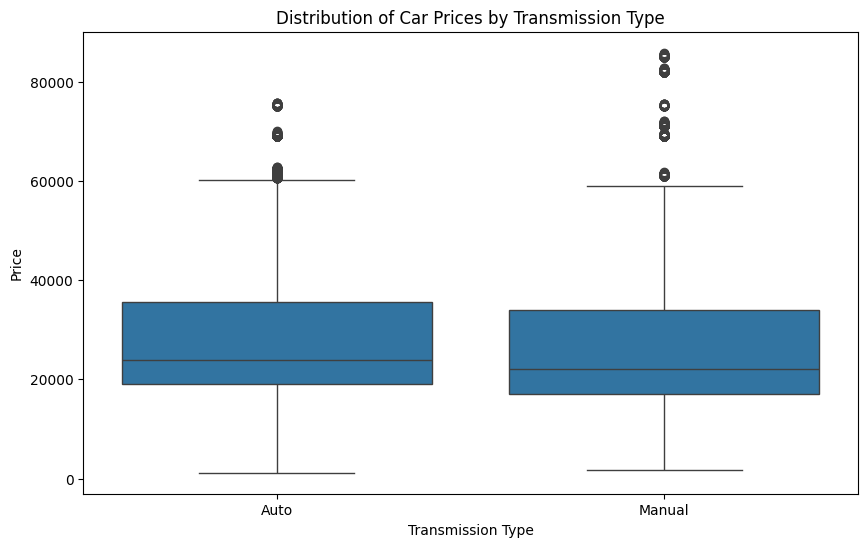

IQR for Auto: 16500.0
IQR for Manual: 17000.0


In [97]:
# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.show()

for transmission_type in df['Transmission'].unique():
    IQR = df[df['Transmission'] == transmission_type]['Price ($)'].quantile(0.75) - df[df['Transmission'] == transmission_type]['Price ($)'].quantile(0.25)
    print(f"IQR for {transmission_type}: {IQR}")

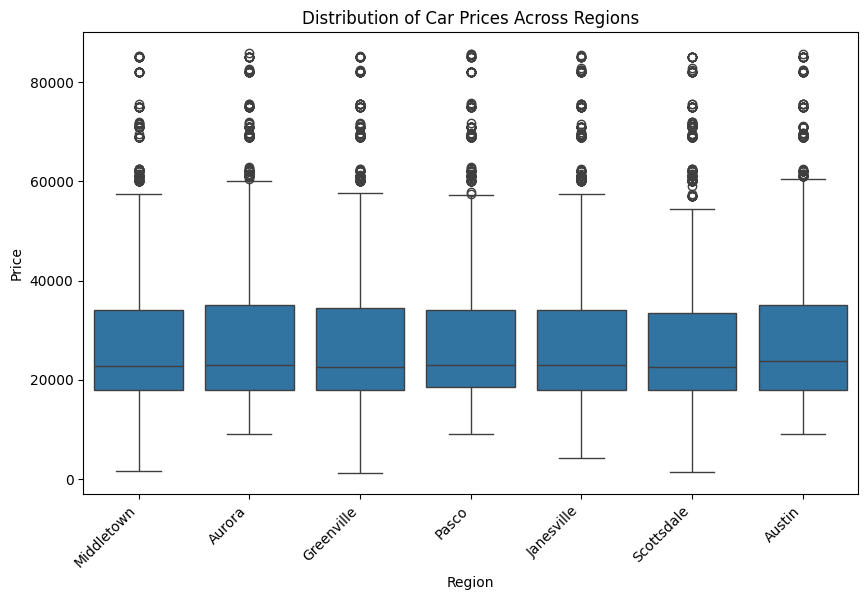

In [98]:
# 4. What is the distribution of car prices across different regions?

plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Distribution of Car Prices Across Regions')
plt.xlabel('Region')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

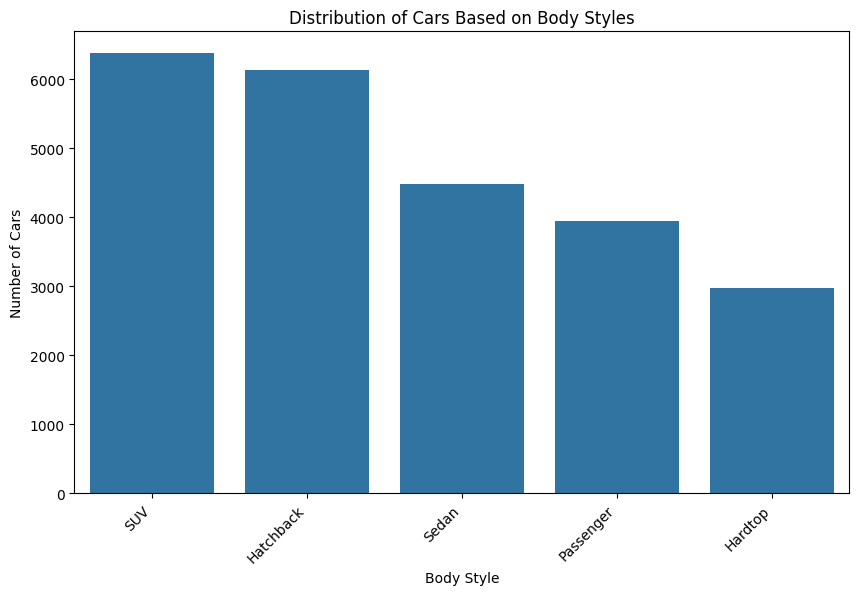

In [99]:
# 5. What is the distribution of cars based on body styles?

body_style_counts = df['Body Style'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=body_style_counts.index, y=body_style_counts.values)
plt.title('Distribution of Cars Based on Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45, ha='right')
plt.show()

Average selling price by gender and annual income:
 Annual Income  10080         13500     24000     85000     106000    121000    \
Gender                                                                          
Female              NaN  28132.038732       NaN       NaN   46001.0   20000.0   
Male            22801.0  27809.493111   61001.0   43000.0       NaN       NaN   

Annual Income  131000    145000    160000    170000    ...  6125000   \
Gender                                                 ...             
Female              NaN       NaN       NaN       NaN  ...       NaN   
Male            17000.0   16500.0   18334.0   14500.0  ...   19501.0   

Annual Income  6240000   6400000   6460000   6500000   6600000   6800000   \
Gender                                                                      
Female          42000.0   32001.0   14000.0       NaN       NaN       NaN   
Male                NaN   71000.0       NaN   25000.0   39000.0   15000.0   

Annual Income  7650000   

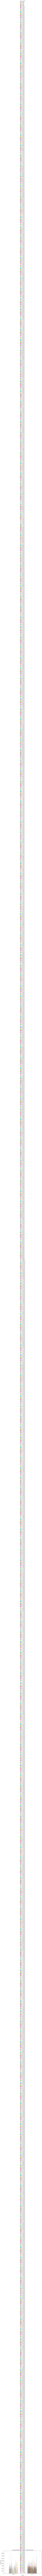

In [100]:
# 6. How does the average selling price of cars vary by customer gender and annual income?

avg_price_by_gender_income = df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().unstack()
print("Average selling price by gender and annual income:\n", avg_price_by_gender_income)

avg_price_by_gender_income.plot(kind='bar', figsize=(10, 6))
plt.title('Average Selling Price by Gender and Annual Income')
plt.xlabel('Gender')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.legend(title='Annual Income')
plt.show()

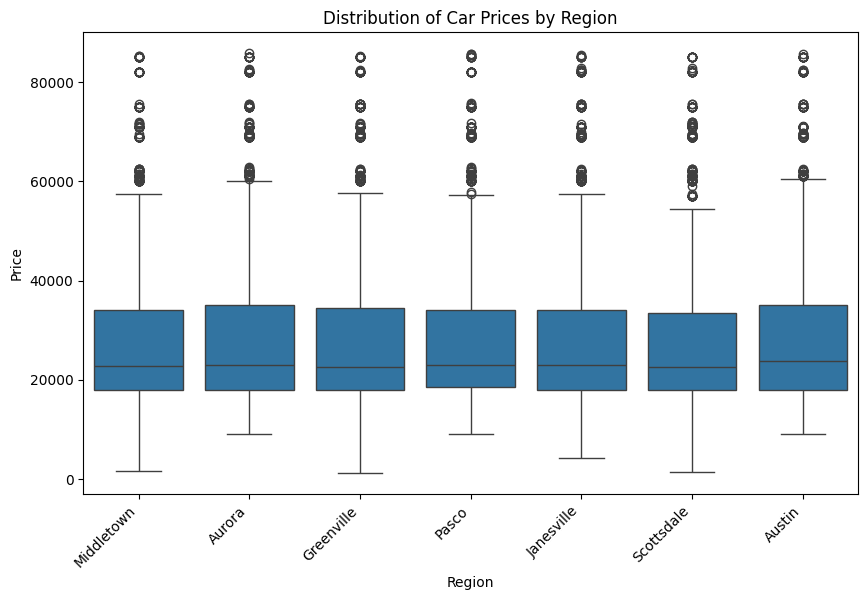

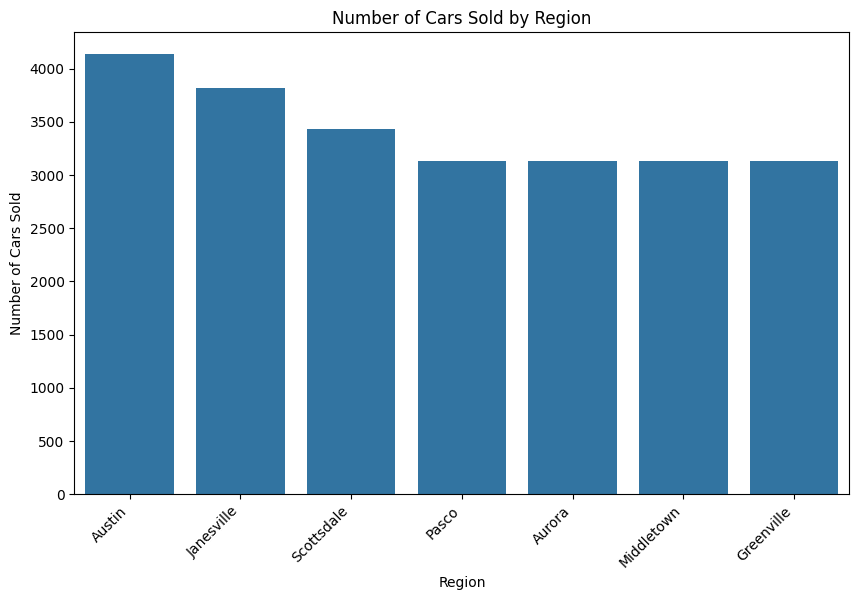

In [101]:
# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Region')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

cars_sold_by_region = df['Dealer_Region'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=cars_sold_by_region.index, y=cars_sold_by_region.values)
plt.title('Number of Cars Sold by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.show()


Average car price by engine size:
 Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


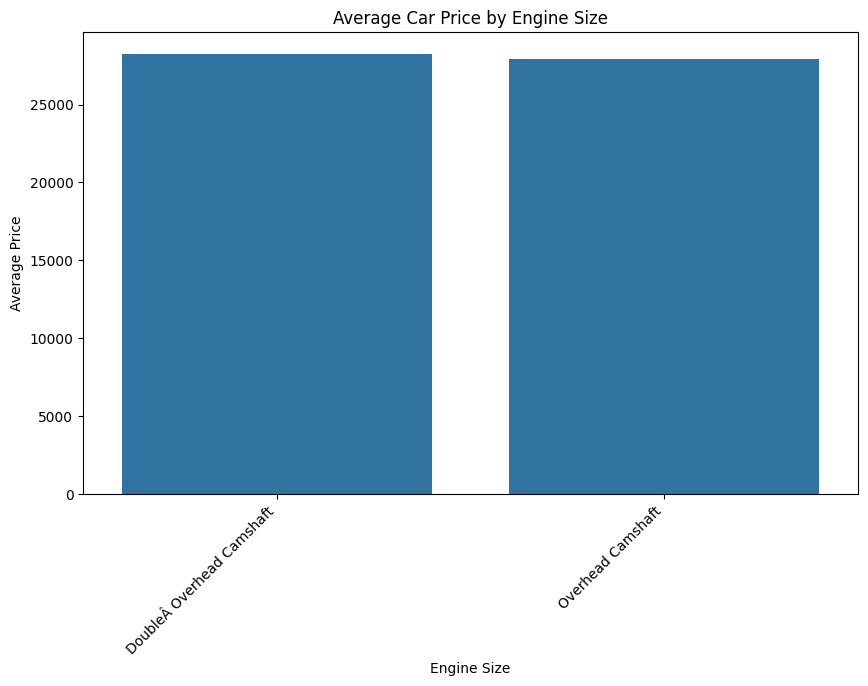

In [102]:
# 8. How does the average car price differ between cars with different engine sizes?
avg_price_by_engine_size = df.groupby('Engine')['Price ($)'].mean()
print("Average car price by engine size:\n", avg_price_by_engine_size)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_engine_size.index, y=avg_price_by_engine_size.values)
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()


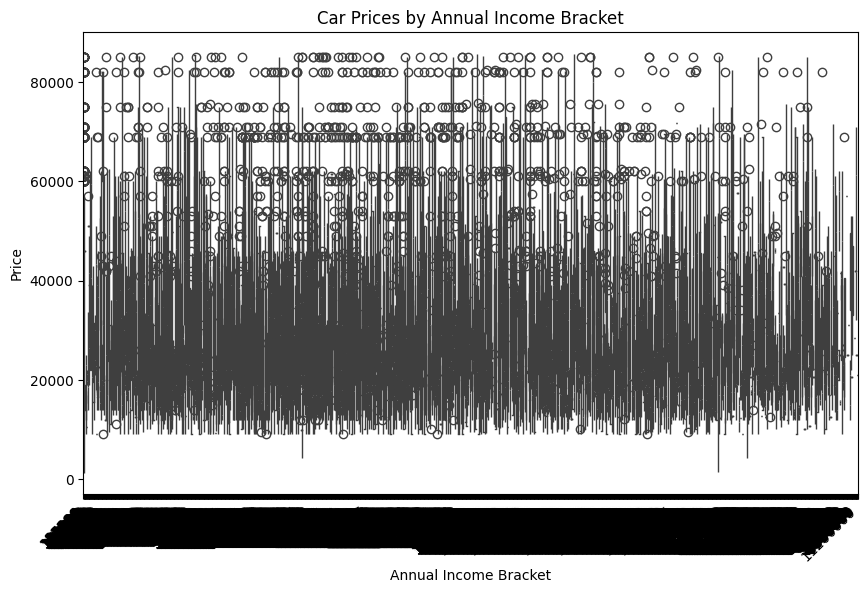

In [103]:
# 9. How do car prices vary based on the customer’s annual income bracket?

plt.figure(figsize=(10, 6))
sns.boxplot(x='Annual Income', y='Price ($)', data=df)
plt.title('Car Prices by Annual Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

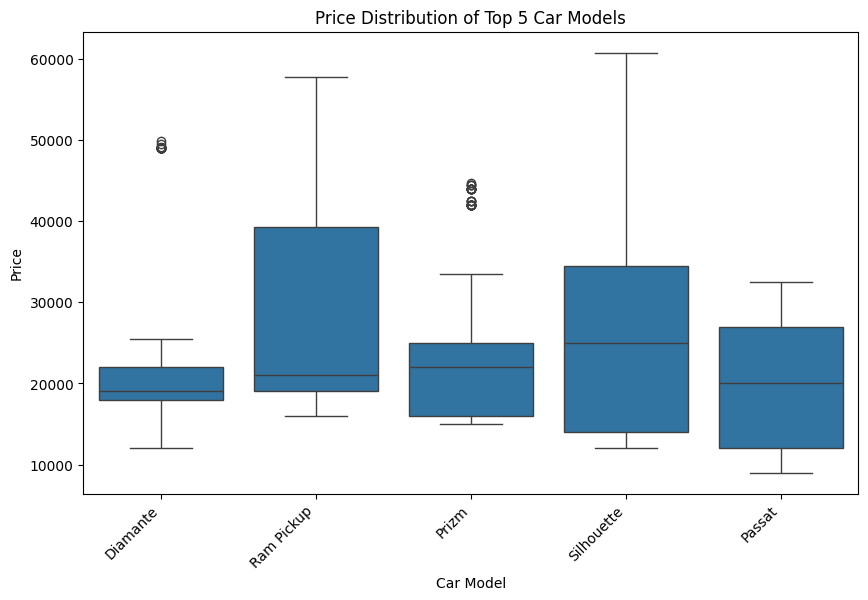

In [104]:
# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

top_5_models = df['Model'].value_counts().head(5).index
top_5_models_df = df[df['Model'].isin(top_5_models)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Price ($)', data=top_5_models_df)
plt.title('Price Distribution of Top 5 Car Models')
plt.xlabel('Car Model')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

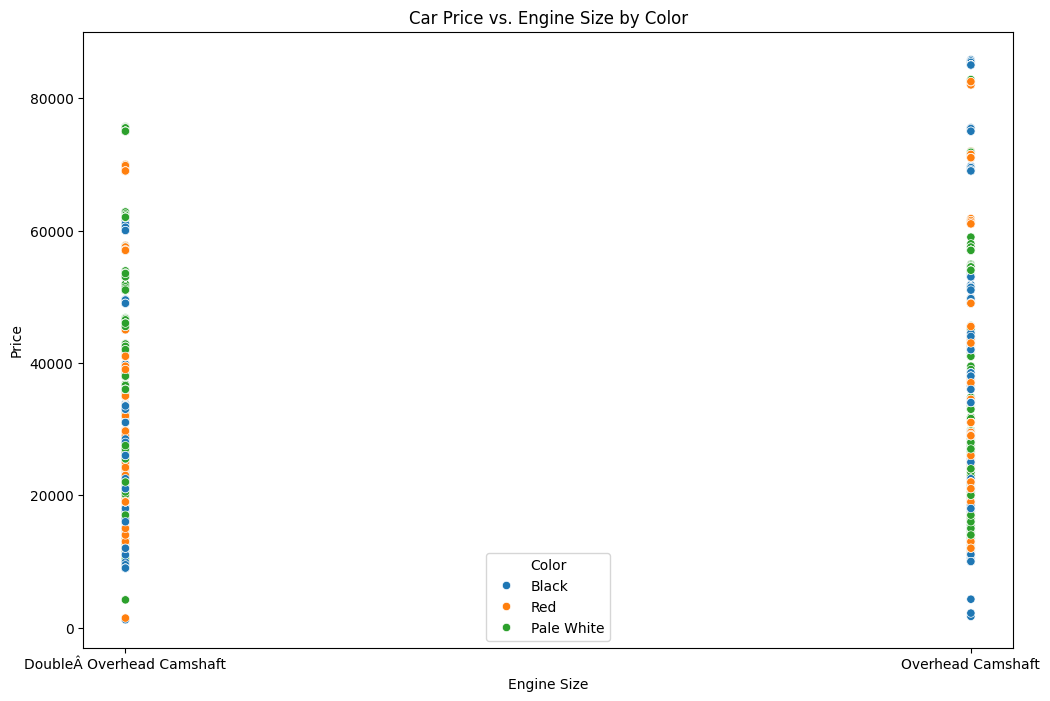

Car color with the highest price variation: Red


In [105]:
# 11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Engine', y='Price ($)', hue='Color', data=df)
plt.title('Car Price vs. Engine Size by Color')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

price_variation_by_color = df.groupby('Color')['Price ($)'].std()
color_with_highest_variation = price_variation_by_color.idxmax()
print(f"Car color with the highest price variation: {color_with_highest_variation}")


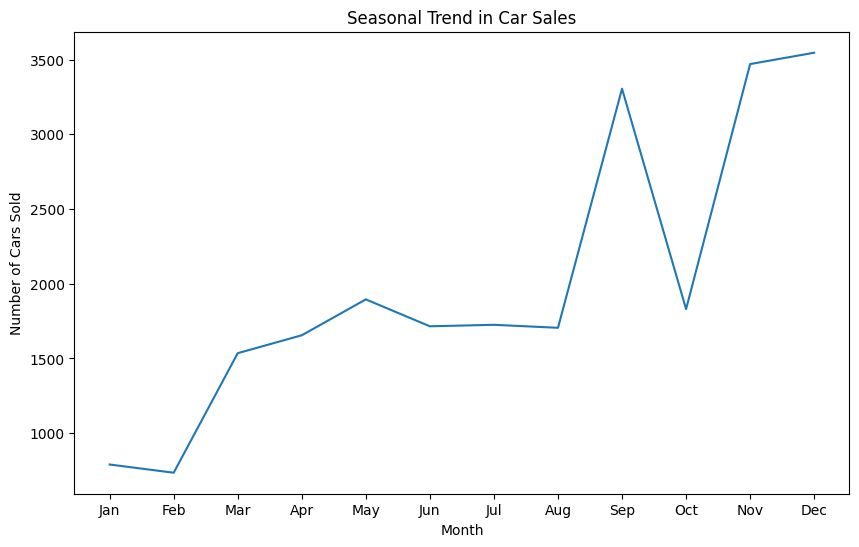

In [106]:
# 12. Is there any seasonal trend in car sales based on the date of sale?

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

monthly_sales = df.groupby('Month')['Price ($)'].count()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Seasonal Trend in Car Sales')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

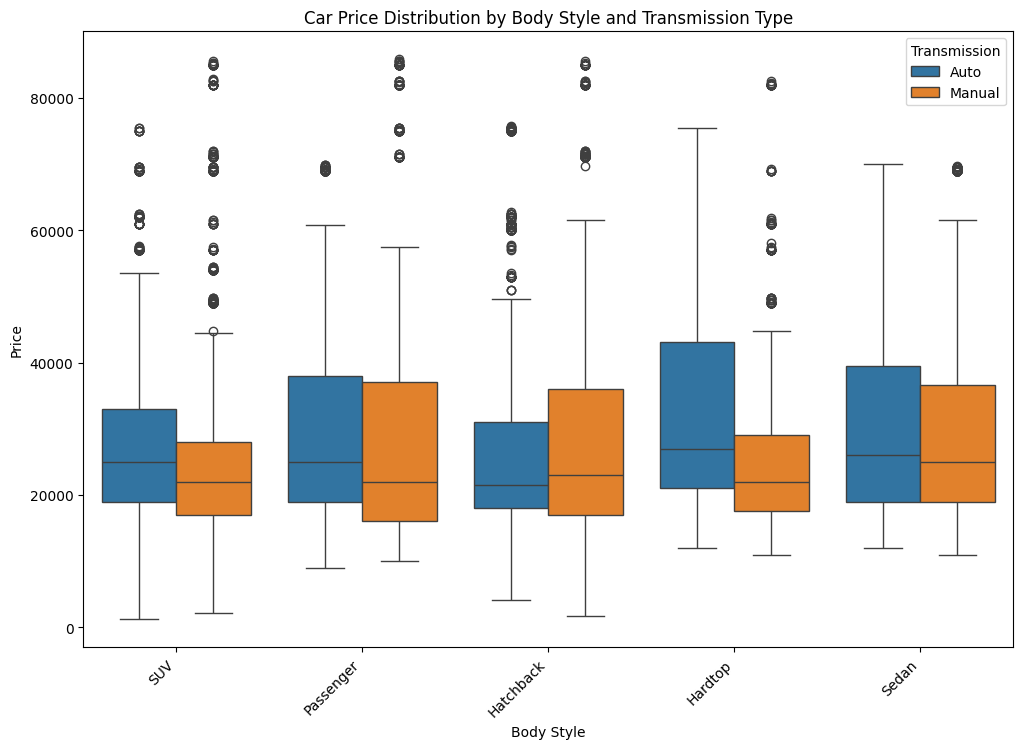

In [107]:
# 13. How does the car price distribution change when considering different combinations of body style and transmission type?
plt.figure(figsize=(12, 8))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()


Correlation matrix:
                Price ($)  Annual Income
Price ($)       1.000000       0.012065
Annual Income   0.012065       1.000000


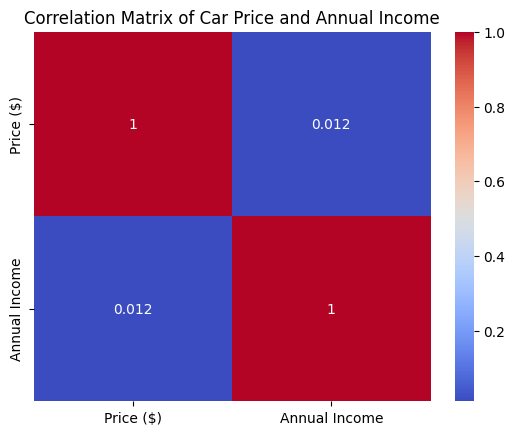

In [109]:
# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

correlation_matrix = df[['Price ($)', 'Annual Income']].corr()
print("Correlation matrix:\n", correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Car Price and Annual Income')
plt.show()

Average car price by model and engine type:
 Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                  37986.380117                NaN
3000GT                 22764.326923       21770.659864
300M                   21394.888889                NaN
323i                   16744.632287       21038.162162
328i                   21069.149606       38676.177215
...                             ...                ...
Viper                  32118.479167       26052.375000
Voyager                22066.026316       33995.678322
Windstar               25145.636364       17100.272727
Wrangler               21145.294737       18742.942029
Xterra                 15940.459459       31072.500000

[154 rows x 2 columns]


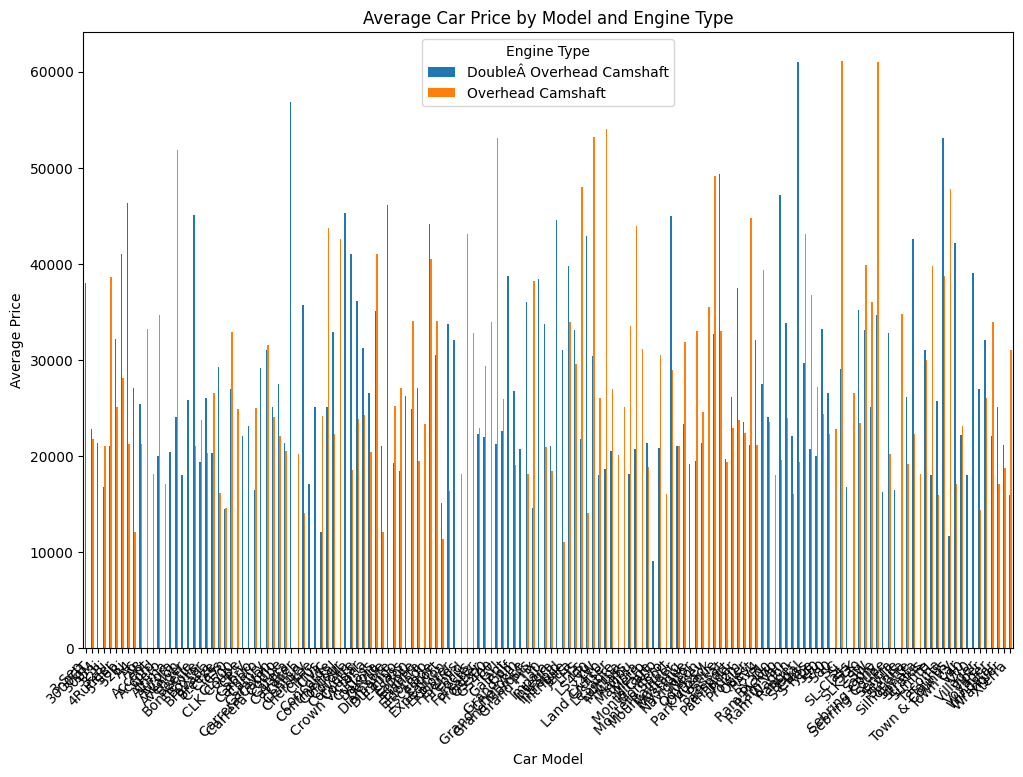

In [110]:
# 15. How does the average car price vary across different car models and engine types?

avg_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()
print("Average car price by model and engine type:\n", avg_price_by_model_engine)

avg_price_by_model_engine.plot(kind='bar', figsize=(12, 8))
plt.title('Average Car Price by Model and Engine Type')
plt.xlabel('Car Model')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Engine Type')
plt.show()


EDA - 3

In [112]:

df=pd.read_csv('amazon.csv')
df.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%    4.0       43,994   
2       ₹1,899                 90%    3.9        7,928   
3         ₹699                 53%    4.2       94,363   
4         ₹399                 61%    4.2       16,905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [115]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [120]:
# 1. What is the average rating for each product category?
avg_rating_by_category = df.groupby('category')['rating'].mean()
print("Average rating for each product category:\n", avg_rating_by_category)



Average rating for each product category:
 category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProdu

In [121]:
# 2. What are the top rating_count products by category?
top_products_by_category = df.loc[df.groupby('category')['rating_count'].idxmax()]
print("Top rating_count products by category:\n", top_products_by_category[['category', 'product_name', 'rating_count']])

Top rating_count products by category:
                                                category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
772   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
616   OfficeProducts|OfficePaperProducts|Paper|Stati...   
993   OfficeProducts|OfficePaperProducts|Paper|Stati...   
765   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1,118  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...        4,426  
906   Hp Wired On Ear Headphones With 

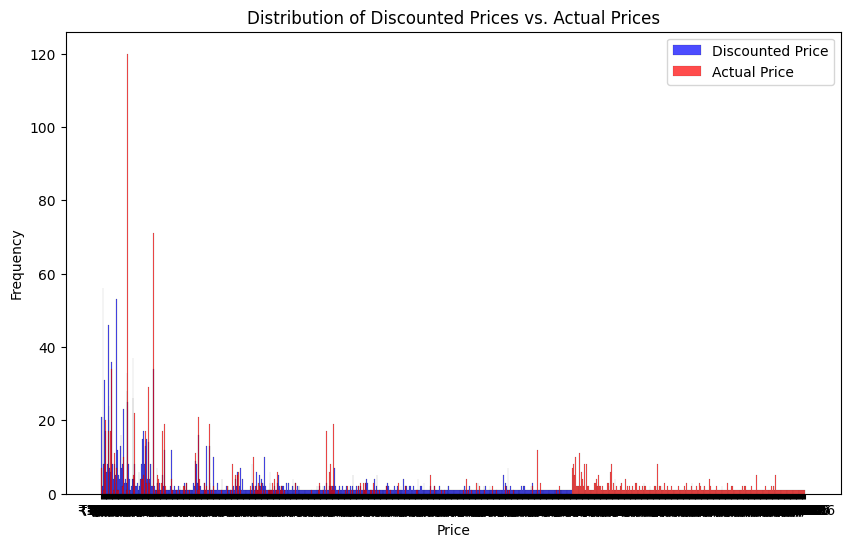

In [122]:
# 3. What is the distribution of discounted prices vs. actual prices?
plt.figure(figsize=(10, 6))
sns.histplot(df['discounted_price'], label='Discounted Price', color='blue', alpha=0.7)
sns.histplot(df['actual_price'], label='Actual Price', color='red', alpha=0.7)
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [123]:
# 4. How does the average discount percentage vary across categories?
df['discount_percentage'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100
avg_discount_by_category = df.groupby('category')['discount_percentage'].mean()
print("Average discount percentage by category:\n", avg_discount_by_category)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
# 4. How does the average discount percentage vary across categories?
df['discount_percentage'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100
avg_discount_by_category = df.groupby('category')['discount_percentage'].mean()
print("Average discount percentage by category:\n", avg_discount_by_category)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
# 4. How does the average discount percentage vary across categories?
df['discount_percentage'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100
avg_discount_by_category = df.groupby('category')['discount_percentage'].mean()
print("Average discount percentage by category:\n", avg_discount_by_category)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [124]:

# 4. How does the average discount percentage vary across categories?
df['actual_price'] = pd.to_numeric(df['actual_price'].str.replace(',', '').str.replace('₹', ''), errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'].str.replace(',', '').str.replace('₹', ''), errors='coerce')
df['discount_percentage'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100
avg_discount_by_category = df.groupby('category')['discount_percentage'].mean()
print("Average discount percentage by category:\n", avg_discount_by_category)



Average discount percentage by category:
 category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    41.525000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.387733
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.035035
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.335120
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.719582
                                                                                                                            ...    
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.000000
OfficeProducts|OfficePape

In [125]:
# 5. What are the most popular product names?
most_popular_products = df['product_name'].value_counts().head(10)
print("Most popular product names:\n", most_popular_products)

Most popular product names:
 product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                            5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                     4
Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function for iPhone, iPad (Grey)                                                                                       3
pTron Solero TB301 3A Type-C Data and Fast Charging Cable, Made in India, 480Mbps Data Sync, Strong and Durable 1.5-Meter Nylon Braided USB Cable for Type-C Devices for Charging Adapter (Black)    3
Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices                          

In [126]:
# 6. What are the most popular product keywords?
all_keywords = []
for keywords in df['product_name']:
    all_keywords.extend(str(keywords).lower().split())
keyword_counts = Counter(all_keywords)
most_common_keywords = keyword_counts.most_common(10)
print("Most popular product keywords:\n", most_common_keywords)

Most popular product keywords:
 [('with', 751), ('for', 672), ('|', 457), ('&', 432), ('usb', 377), ('and', 330), ('cable', 320), ('-', 220), ('charging', 219), ('to', 218)]


In [128]:

# 7. What are the most popular product reviews?
df['review_count'] = df.groupby('product_name')['rating'].transform('count')
df.sort_values(by=['review_count', 'rating'], ascending=[False, False], inplace=True)
print("Most popular product reviews:\n", df[['product_name', 'review_count', 'rating']].head(10))


Most popular product reviews:
                                           product_name  review_count  rating
334  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...             5     4.2
364  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...             5     4.2
368  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...             5     4.2
372  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...             5     4.2
380  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...             5     4.2
335  Fire-Boltt Phoenix Smart Watch with Bluetooth ...             4     4.3
385  Fire-Boltt Phoenix Smart Watch with Bluetooth ...             4     4.3
508  Fire-Boltt Phoenix Smart Watch with Bluetooth ...             4     4.3
586  Fire-Boltt Phoenix Smart Watch with Bluetooth ...             4     4.3
20   Duracell USB Lightning Apple Certified (Mfi) B...             3     4.5


In [129]:
# 8. What is the correlation between discounted_price and rating?
correlation = df['discounted_price'].corr(df['rating'])
print("Correlation between discounted_price and rating:", correlation)


Correlation between discounted_price and rating: 0.12033741712288537


In [130]:
# 9. What are the Top 5 categories based on the highest ratings?
top_5_categories = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print("Top 5 categories based on highest ratings:\n", top_5_categories)

Top 5 categories based on highest ratings:
 category
Computers&Accessories|Tablets                                                                 4.6
OfficeProducts|OfficeElectronics|Calculators|Basic                                            4.5
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|SmallApplianceParts&Accessories    4.5
Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea&Espresso|CoffeePresses                         4.5
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                      4.5
Name: rating, dtype: float64



10. Identify any potential areas for improvement or optimization based on the data analysis

Optimize discount strategies based on category performance.
Implement targeted discounts based on product or customer segments.
Focus on stocking and promoting high-performing products.
Expand product selection in popular and high-rated categories.

EDA - 4

In [131]:
df=pd.read_csv('spotify.csv')
df.head()

Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51JsHbxhe

In [132]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [135]:
# 1. Read the dataframe, check for null values if present then do the needful, check for duplicate rows, if present then do the needful.

print("Null values:\n", df.isnull().sum())

print("\nDuplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

Null values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Duplicate rows: 0


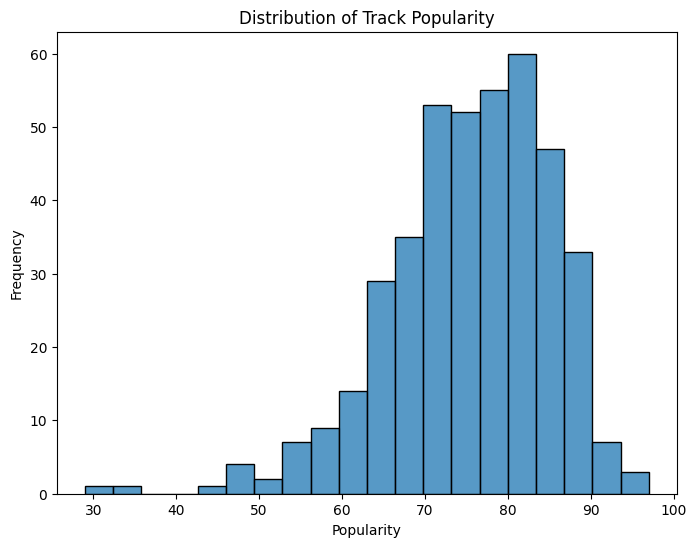

In [137]:
# 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.
plt.figure(figsize=(8, 6))
sns.histplot(df['Popularity'], bins=20)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

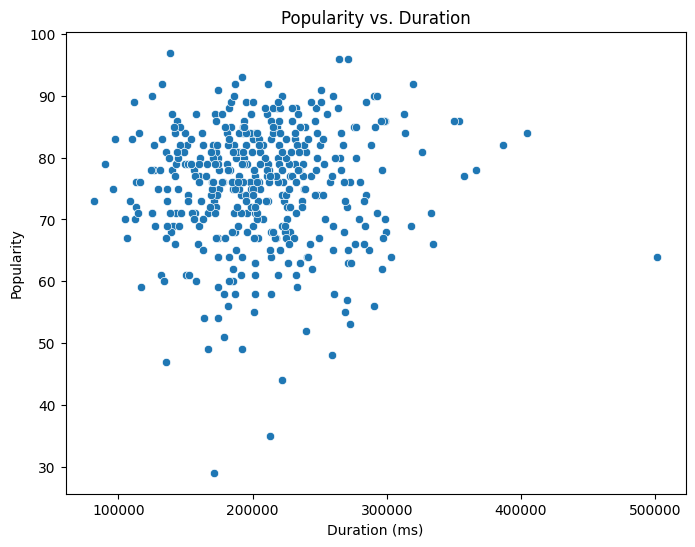

In [139]:
# 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df)
plt.title('Popularity vs. Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

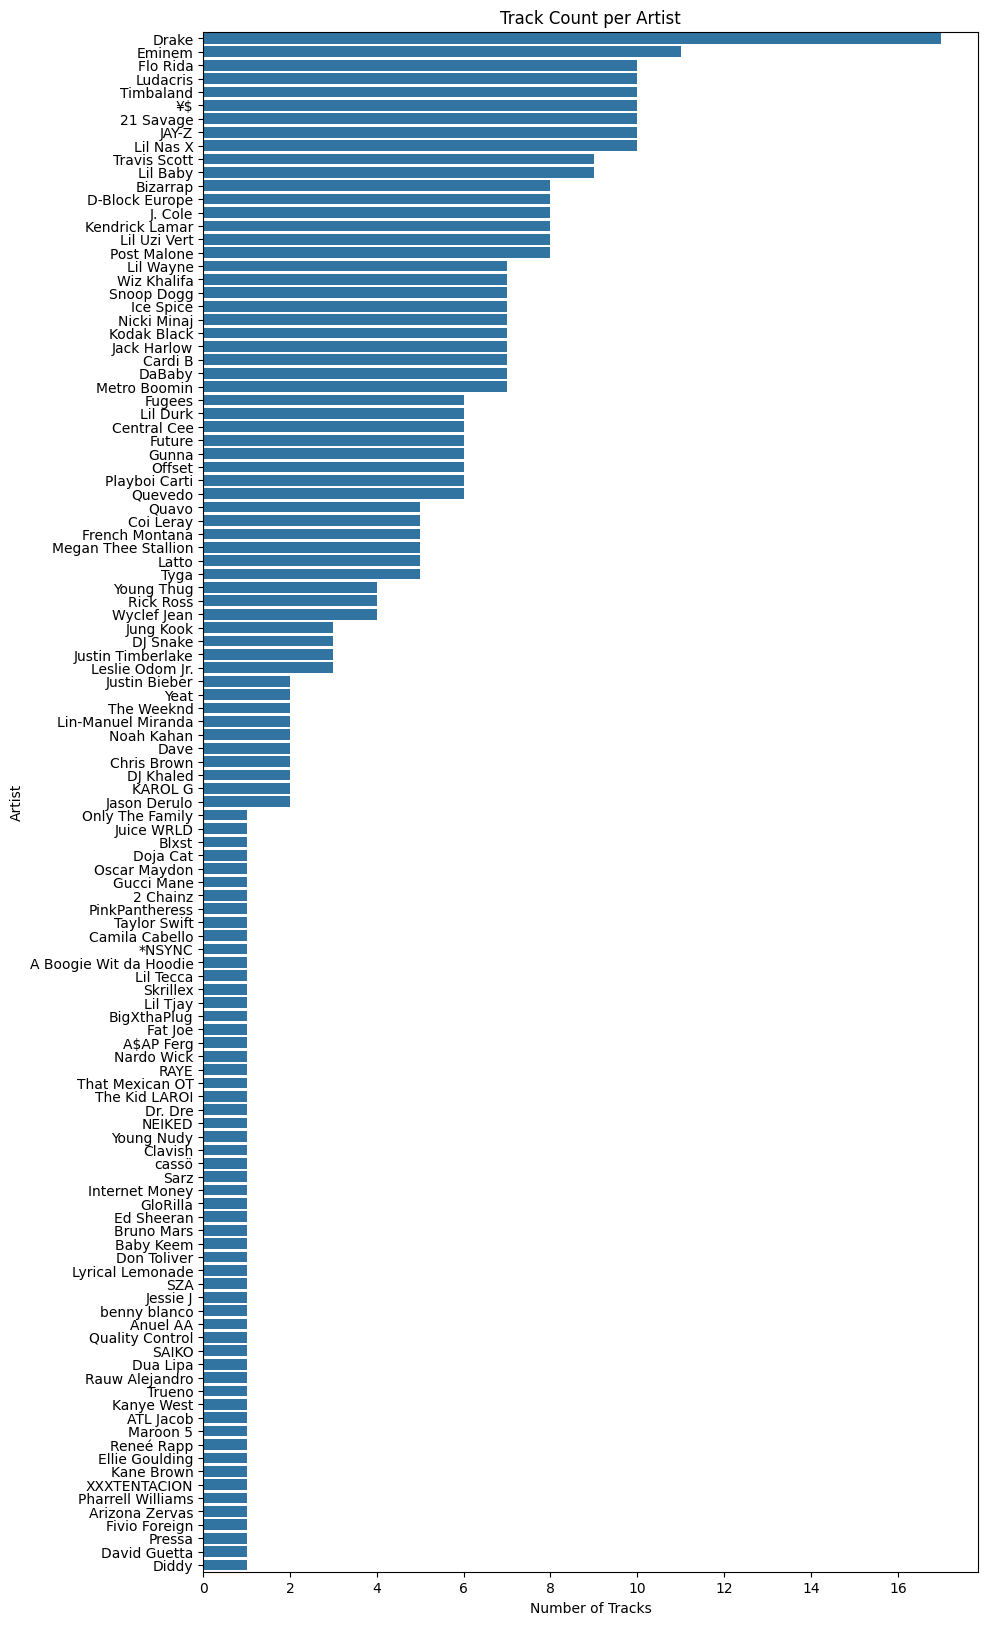

In [141]:
# 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.
plt.figure(figsize=(10, 20))
sns.countplot(y='Artist', data=df, order=df['Artist'].value_counts().index)
plt.title('Track Count per Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

In [142]:
# 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.
least_popular_tracks = df.sort_values(by=['Popularity']).head(5)
print("Top 5 least popular tracks:\n", least_popular_tracks[['Artist', 'Track Name']])

Top 5 least popular tracks:
              Artist                     Track Name
207          Pressa  Attachments (feat. Coi Leray)
231   Justin Bieber                     Intentions
413  French Montana                Splash Brothers
225        Lil Baby                  On Me - Remix
407     Wyclef Jean      911 (feat. Mary J. Blige)


In [143]:
# 6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

top_5_artists = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5).index
avg_popularity_top_artists = df[df['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean()
print("Average popularity of top 5 most popular artists:\n", avg_popularity_top_artists)

Average popularity of top 5 most popular artists:
 Artist
David Guetta    87.000000
Travis Scott    86.555556
Trueno          89.000000
cassö           92.000000
¥$              85.100000
Name: Popularity, dtype: float64


In [146]:
# 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.


filtered_df = df[df['Artist'].isin(top_5_artists)]
most_popular_tracks_top_artists = filtered_df.loc[filtered_df.groupby('Artist')['Popularity'].idxmax()]

print("Most popular tracks of top 5 most popular artists:\n", most_popular_tracks_top_artists[['Artist', 'Track Name']])

Most popular tracks of top 5 most popular artists:
            Artist                    Track Name
200  David Guetta            Baby Don't Hurt Me
30   Travis Scott    FE!N (feat. Playboi Carti)
241        Trueno  Mamichula - con Nicki Nicole
140         cassö                         Prada
260            ¥$                      CARNIVAL


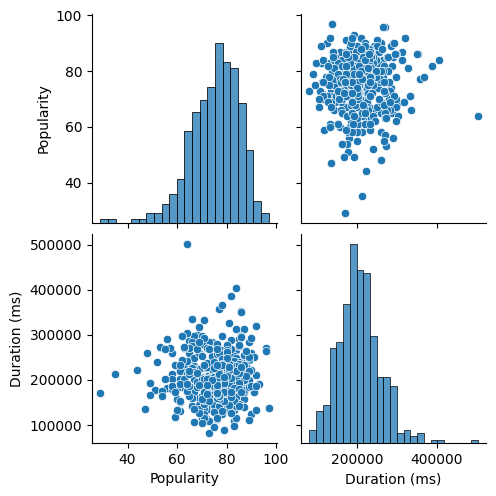

In [148]:
# 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.show()


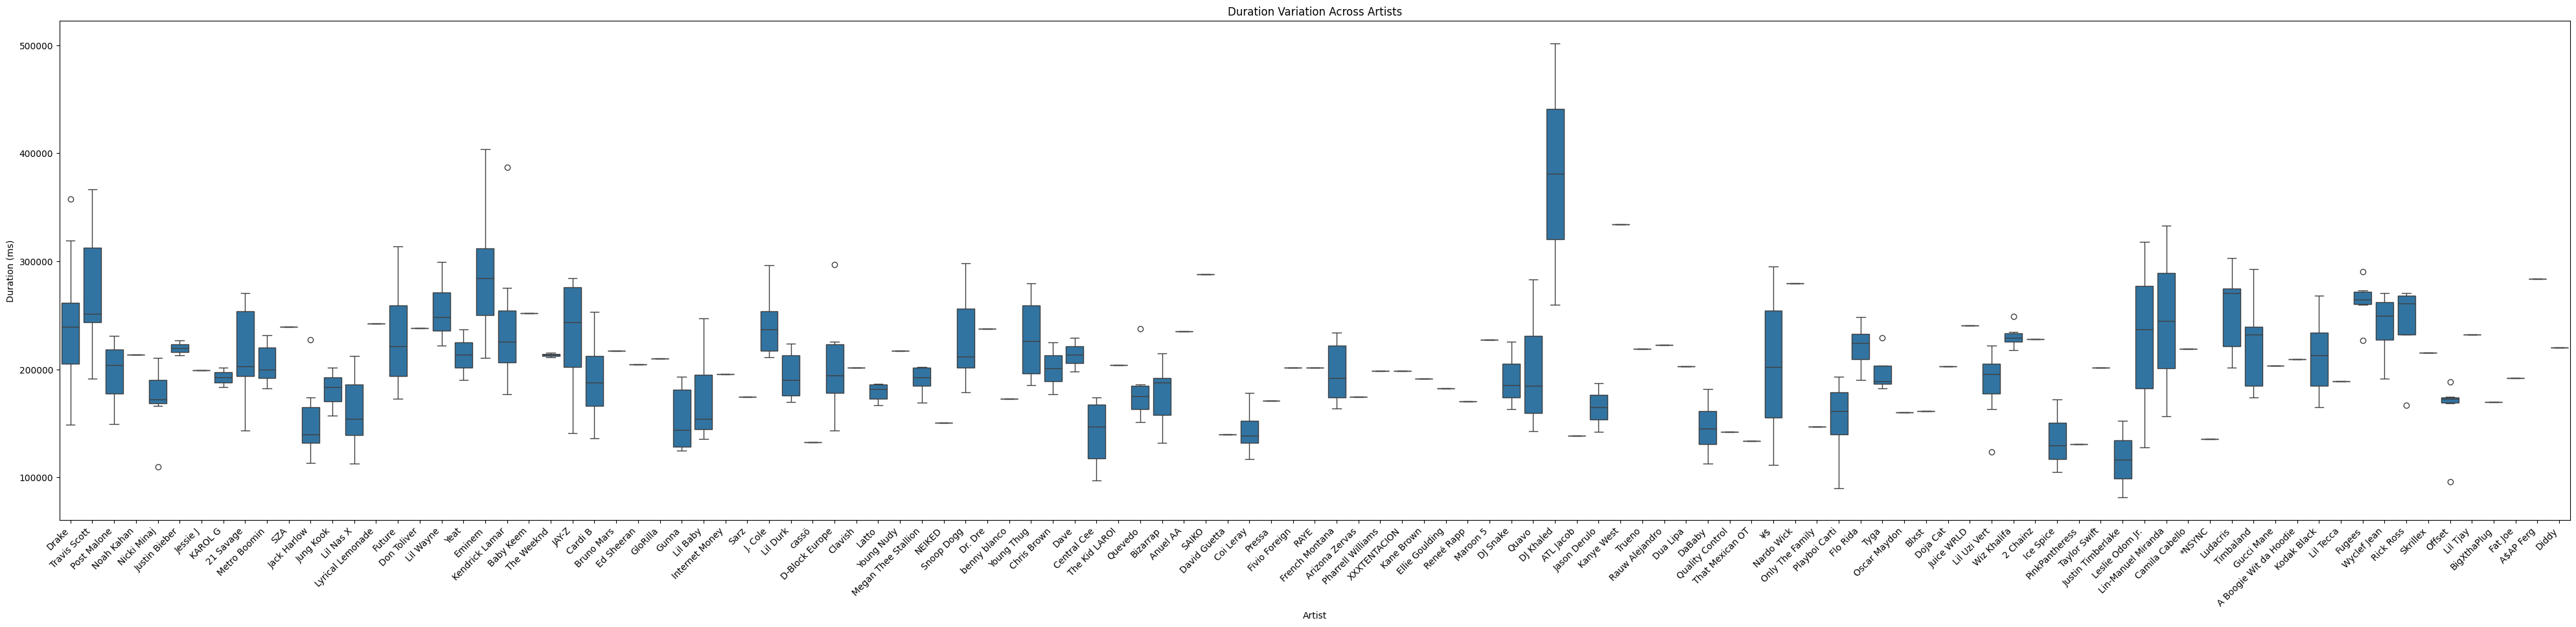

In [153]:
# 9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.



plt.figure(figsize=(50, 10))
sns.boxplot(x='Artist', y='Duration (ms)', data=df)
plt.title('Duration Variation Across Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45, ha='right')
plt.show()

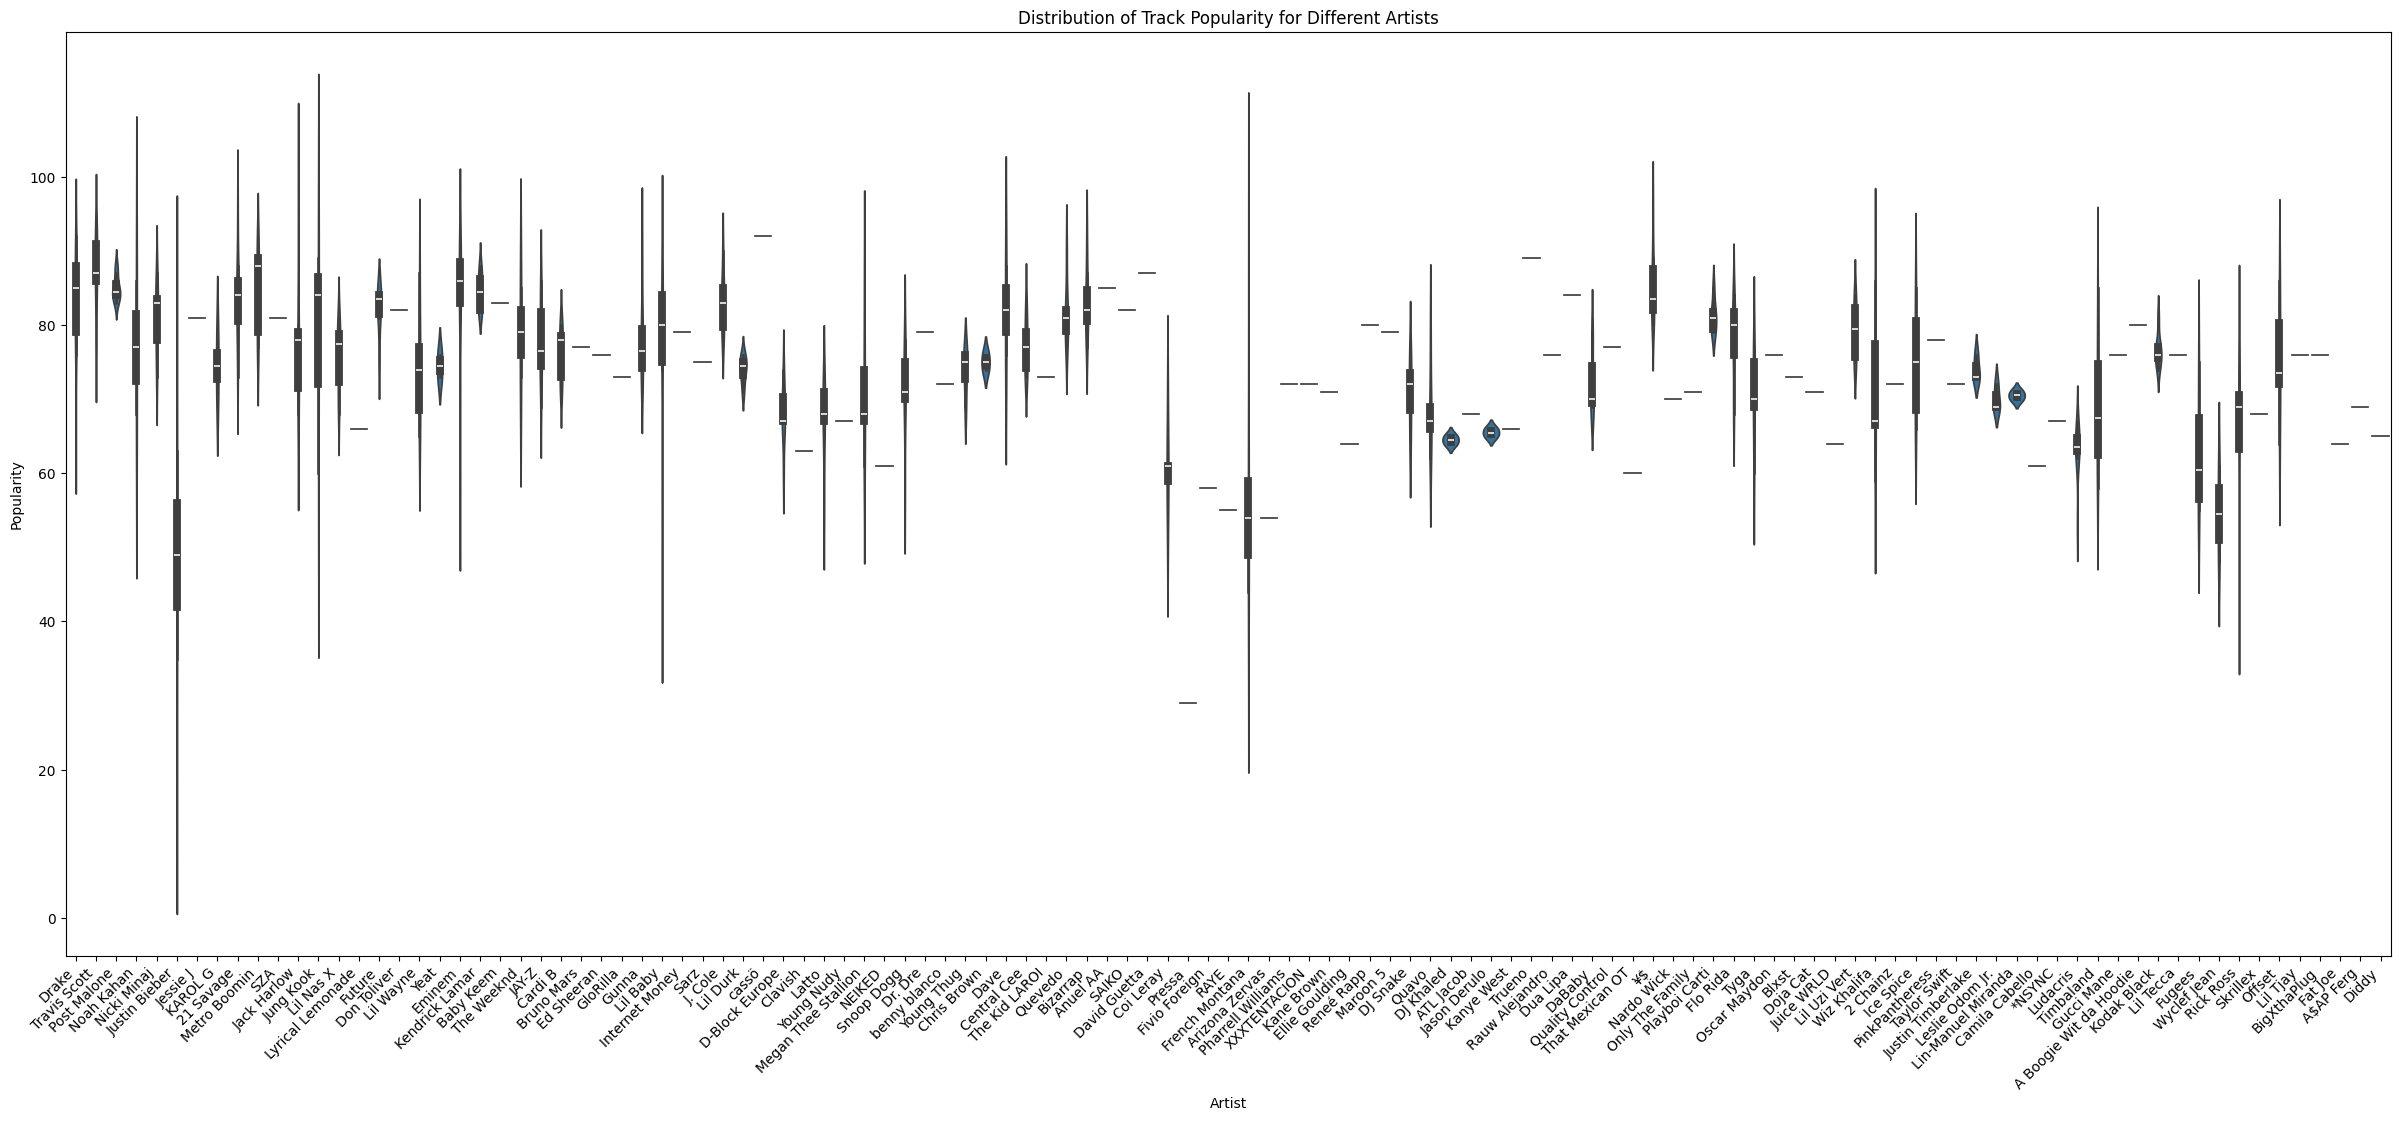

In [158]:
# 10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.


plt.figure(figsize=(30, 12))
sns.violinplot(x='Artist', y='Popularity', data=df)
plt.title('Distribution of Track Popularity for Different Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45, ha='right')
plt.show()